In [27]:
include("../modules/IVTmodel.jl")


plotMg2PPiphasediagram (generic function with 1 method)

In [3]:
using Pkg
Pkg.activate("../IVTmodel")
Pkg.instantiate()
include("../modules/IVTmodel.jl")
#Generates settings for parameters used
fittingmodel = setupmodel_IVT4()
#Imports calibration data from csv files
modeldata = importakamadata()
osumidata = importosumidata()
#Imports PPiase validation data
PPiasedata = importakamaPPiasedata();
akamafittedparametersmatrix = Matrix(CSV.read("../outputs/fittedparameters.csv", DataFrame,header=false))
fittedparamslist = reshape(akamafittedparametersmatrix,(size(akamafittedparametersmatrix)[1],))
covariancemat = Matrix(CSV.read("../outputs/covariancematrix.csv", DataFrame,header=false))
fittedparams = fullparameterset(fittingmodel,fittedparamslist)
printresidual(fittingmodel,modeldata,osumidata,fittedparamslist)

  Activating project at `C:\Users\ChemeGrad2021\Documents\Braatz Group\MRNA Synthesis\Published code\IVT2.0\IVTmodel`
Precompiling project...
  ? Metrics
Precompiling Metrics
        Info Given Metrics was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? Metrics
[ Info: Precompiling Metrics [cb9f3049-315b-4f05-b90c-a8adaec4da78]
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
[ Info: Skipping precompilation since __precompile__(false). Importing Metrics [cb9f3049-315b-4f05-b90c-a8adaec4da78].
┌ Warning: Replacing docs for `Metrics.bin_to_cat :: Tuple{Any, Any}` in module `Metrics`
└ @ Base.Docs docs\Docs.jl:243
┌ Warning: Replacing docs for `Metrics.confusion_matrix :: Tuple{Any, Any}` in module `Metrics`
└ @ Base.Docs docs\Docs.jl:243
┌ Warning: Replacing docs for `Metri

Model has 23 fitted parameters, 15 of which have a bayesian prior

┌ Warning: Replacing docs for `Metrics.global_stats :: Tuple{Any, Any}` in module `Metrics`
└ @ Base.Docs docs\Docs.jl:243



Total Residual:                        1004.6
Components of residual:
Concentration Trajectories (Figure 2): 409.8
Initial Reaction Rate (Figure 3A):     151.7
Mg2PPi solubility (Figure 3B):         234.7
Parameter priors:                      133.7
pH Effect Data:                        74.7


In [4]:
function plotCSTRdilution!(plt,substraterange,substratein,tau)
    plottingrange = LinRange(substraterange[1],substraterange[2],2)
    dilutioncurve = (1e6/(4*180))*[(substratein-substrateout)/tau for substrateout in plottingrange]
    plot!(plt,1000*plottingrange,dilutioncurve)
    return plt
end

plotCSTRdilution! (generic function with 1 method)

In [13]:
function getLevenspielplot!(plt, params, inputs; limitingNTP = 1, inletflow = inputs.ATP, label = "", maxconversion = 0.95,reactionkwargs...)
    sol = runDAE_batch(params, inputs; reactionkwargs...)
    conversions = conversion(sol,params; limitingNTP = limitingNTP)
    rates = IVTrate(sol,params; limitingNTP = limitingNTP)
    Levenspielxaxis = conversions[conversions .< maxconversion]
    Levenspielyaxis = (-0.00125 ./rates)[conversions .< maxconversion]

    plot!(plt,Levenspielxaxis,Levenspielyaxis, ylabel = L"F_{NTP}/-r_{NTP}", xlabel = L"X", label = label, xlims = (0,0.95))
end
function conversionpHplot!(plt, params, inputs; limitingNTP = 1, label = "", maxconversion = 0.95,reactionkwargs...)
    sol = runDAE_batch(params, inputs; reactionkwargs...)
    conversions = conversion(sol,params; limitingNTP = limitingNTP)
    phs = ph(sol,params)
    xaxis = conversions[conversions .< maxconversion]
    yaxis = phs[conversions .< maxconversion]

    plot!(plt,xaxis,yaxis, ylabel = L"pH", xlabel = L"X", label = label, xlims = (0,0.95))
end

conversionpHplot! (generic function with 1 method)

In [14]:
T7RNAP = 200e-9
Buffer = 0.040
DNA = 24.48
PPiase = 5
NTPconc = 30e-3
Mgconc = 7e-3
stoich = (180,180,180,180)
finaltime = 35

inputs =(T7RNAP = T7RNAP, ATP = NTPconc/4,UTP = NTPconc/4,CTP = NTPconc/4,GTP = NTPconc/4, Mg = Mgconc, Buffer = Buffer, DNA = DNA, final_time = finaltime)
sol = runDAE_batch(fittedparams,inputs; PPiase = PPiase, stoich = stoich, OAccounterion = false);

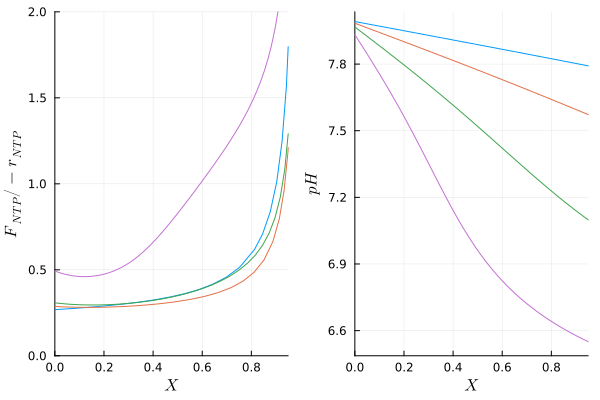

In [15]:
pltL = plot(ylims = (0,2))
pltpH = plot()
maxconversion = 0.99
tol = 1e-8
finaltime = 3

NTPconc = 5e-3
Mgconc = 10e-3

inputs =(T7RNAP = T7RNAP, ATP = NTPconc/4,UTP = NTPconc/4,CTP = NTPconc/4,GTP = NTPconc/4, Mg = Mgconc, Buffer = Buffer, DNA = DNA, final_time = finaltime)

getLevenspielplot!(pltL,fittedparams,inputs; PPiase = PPiase, stoich = stoich, NaperNTP = 3.96, maxconversion = maxconversion, tol = tol)
conversionpHplot!(pltpH,fittedparams,inputs; PPiase = PPiase, stoich = stoich, NaperNTP = 3.96, maxconversion = maxconversion, tol = tol)

NTPconc = 10e-3
Mgconc = 10e-3

inputs =(T7RNAP = T7RNAP, ATP = NTPconc/4,UTP = NTPconc/4,CTP = NTPconc/4,GTP = NTPconc/4, Mg = Mgconc, Buffer = Buffer, DNA = DNA, final_time = finaltime)

getLevenspielplot!(pltL,fittedparams,inputs; PPiase = PPiase, stoich = stoich, NaperNTP = 3.96, maxconversion = maxconversion, tol = tol)
conversionpHplot!(pltpH,fittedparams,inputs; PPiase = PPiase, stoich = stoich, NaperNTP = 3.96, maxconversion = maxconversion, tol = tol)

NTPconc = 20e-3
Mgconc = 20e-3

inputs =(T7RNAP = T7RNAP, ATP = NTPconc/4,UTP = NTPconc/4,CTP = NTPconc/4,GTP = NTPconc/4, Mg = Mgconc, Buffer = Buffer, DNA = DNA, final_time = finaltime)

getLevenspielplot!(pltL,fittedparams,inputs; PPiase = PPiase, stoich = stoich, NaperNTP = 3.96, maxconversion = maxconversion, tol = tol)
conversionpHplot!(pltpH,fittedparams,inputs; PPiase = PPiase, stoich = stoich, NaperNTP = 3.96, maxconversion = maxconversion, tol = tol)

NTPconc = 40e-3
Mgconc = 40e-3
finaltime = 1000
inputs =(T7RNAP = T7RNAP, ATP = NTPconc/4,UTP = NTPconc/4,CTP = NTPconc/4,GTP = NTPconc/4, Mg = Mgconc, Buffer = Buffer, DNA = DNA, final_time = finaltime)

getLevenspielplot!(pltL,fittedparams,inputs; PPiase = PPiase, stoich = stoich, NaperNTP = 3.96, maxconversion = maxconversion, tol = tol)
conversionpHplot!(pltpH,fittedparams,inputs; PPiase = PPiase, stoich = stoich, NaperNTP = 3.96, maxconversion = maxconversion, tol = tol)

plot(pltL,pltpH)

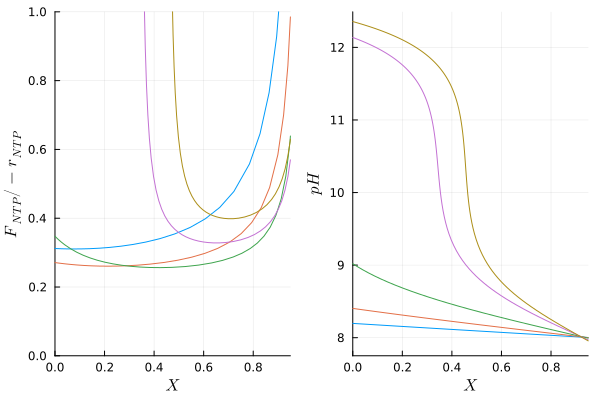

In [16]:
pltL = plot(ylims = (0,1))
pltpH = plot()
maxconversion = 0.99
tol = 1e-8
finaltime = 3

NTPconc = 5e-3
Mgconc = 5e-3

inputs =(T7RNAP = T7RNAP, ATP = NTPconc/4,UTP = NTPconc/4,CTP = NTPconc/4,GTP = NTPconc/4, Mg = Mgconc, Buffer = Buffer, DNA = DNA, final_time = finaltime)

getLevenspielplot!(pltL,fittedparams,inputs; PPiase = PPiase, stoich = stoich, NaperNTP = 4.90, maxconversion = maxconversion, tol = tol)
conversionpHplot!(pltpH,fittedparams,inputs; PPiase = PPiase, stoich = stoich, NaperNTP = 4.90, maxconversion = maxconversion, tol = tol)

NTPconc = 10e-3
Mgconc = 10e-3

inputs =(T7RNAP = T7RNAP, ATP = NTPconc/4,UTP = NTPconc/4,CTP = NTPconc/4,GTP = NTPconc/4, Mg = Mgconc, Buffer = Buffer, DNA = DNA, final_time = finaltime)

getLevenspielplot!(pltL,fittedparams,inputs; PPiase = PPiase, stoich = stoich, NaperNTP = 4.90, maxconversion = maxconversion, tol = tol)
conversionpHplot!(pltpH,fittedparams,inputs; PPiase = PPiase, stoich = stoich, NaperNTP = 4.90, maxconversion = maxconversion, tol = tol)

NTPconc = 20e-3
Mgconc = 20e-3

inputs =(T7RNAP = T7RNAP, ATP = NTPconc/4,UTP = NTPconc/4,CTP = NTPconc/4,GTP = NTPconc/4, Mg = Mgconc, Buffer = Buffer, DNA = DNA, final_time = finaltime)

getLevenspielplot!(pltL,fittedparams,inputs; PPiase = PPiase, stoich = stoich, NaperNTP = 4.90, maxconversion = maxconversion, tol = tol)
conversionpHplot!(pltpH,fittedparams,inputs; PPiase = PPiase, stoich = stoich, NaperNTP = 4.90, maxconversion = maxconversion, tol = tol)

NTPconc = 40e-3
Mgconc = 40e-3
finaltime = 1000
inputs =(T7RNAP = T7RNAP, ATP = NTPconc/4,UTP = NTPconc/4,CTP = NTPconc/4,GTP = NTPconc/4, Mg = Mgconc, Buffer = Buffer, DNA = DNA, final_time = finaltime)

getLevenspielplot!(pltL,fittedparams,inputs; PPiase = PPiase, stoich = stoich, NaperNTP = 4.90, maxconversion = maxconversion, tol = tol)
conversionpHplot!(pltpH,fittedparams,inputs; PPiase = PPiase, stoich = stoich, NaperNTP = 4.90, maxconversion = maxconversion, tol = tol)

NTPconc = 50e-3
Mgconc = 50e-3
finaltime = 1000
inputs =(T7RNAP = T7RNAP, ATP = NTPconc/4,UTP = NTPconc/4,CTP = NTPconc/4,GTP = NTPconc/4, Mg = Mgconc, Buffer = Buffer, DNA = DNA, final_time = finaltime)

getLevenspielplot!(pltL,fittedparams,inputs; PPiase = PPiase, stoich = stoich, NaperNTP = 4.90, maxconversion = maxconversion, tol = tol)
conversionpHplot!(pltpH,fittedparams,inputs; PPiase = PPiase, stoich = stoich, NaperNTP = 4.90, maxconversion = maxconversion, tol = tol)

plot(pltL,pltpH)

┌ Warning: Instability detected. Aborting
└ @ SciMLBase C:\Users\ChemeGrad2021\.julia\packages\SciMLBase\slQep\src\integrator_interface.jl:609
┌ Warning: Instability detected. Aborting
└ @ SciMLBase C:\Users\ChemeGrad2021\.julia\packages\SciMLBase\slQep\src\integrator_interface.jl:609
┌ Warning: Instability detected. Aborting
└ @ SciMLBase C:\Users\ChemeGrad2021\.julia\packages\SciMLBase\slQep\src\integrator_interface.jl:609
┌ Warning: Instability detected. Aborting
└ @ SciMLBase C:\Users\ChemeGrad2021\.julia\packages\SciMLBase\slQep\src\integrator_interface.jl:609
┌ Warning: Instability detected. Aborting
└ @ SciMLBase C:\Users\ChemeGrad2021\.julia\packages\SciMLBase\slQep\src\integrator_interface.jl:609
┌ Warning: Instability detected. Aborting
└ @ SciMLBase C:\Users\ChemeGrad2021\.julia\packages\SciMLBase\slQep\src\integrator_interface.jl:609
┌ Warning: Instability detected. Aborting
└ @ SciMLBase C:\Users\ChemeGrad2021\.julia\packages\SciMLBase\slQep\src\integrator_interface.jl:609

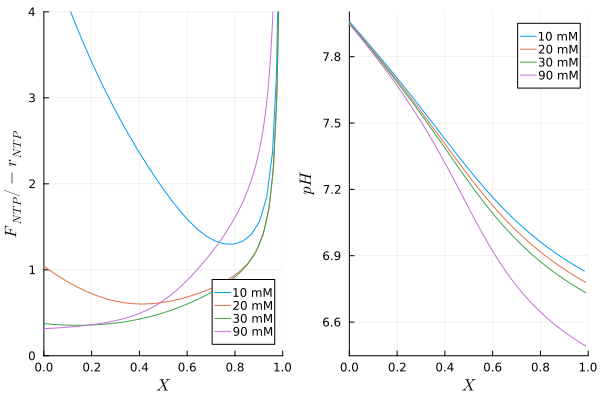

In [17]:
pltL = plot(ylims = (0,4),xlims = (0,1))
pltpH = plot(xlims = (0,1))
maxconversion = 0.99
tol = 1e-7
finaltime = 30

NTPconc = 30e-3
Mgconc = 10e-3

inputs =(T7RNAP = T7RNAP, ATP = NTPconc/4,UTP = NTPconc/4,CTP = NTPconc/4,GTP = NTPconc/4, Mg = Mgconc, Buffer = Buffer, DNA = DNA, final_time = finaltime)

getLevenspielplot!(pltL,fittedparams,inputs; PPiase = PPiase, stoich = stoich, label = "10 mM", NaperNTP = 3.96, maxconversion = maxconversion, tol = tol)
conversionpHplot!(pltpH,fittedparams,inputs; PPiase = PPiase, stoich = stoich, label = "10 mM", NaperNTP = 3.96, maxconversion = maxconversion, tol = tol)

NTPconc = 30e-3
Mgconc = 20e-3

inputs =(T7RNAP = T7RNAP, ATP = NTPconc/4,UTP = NTPconc/4,CTP = NTPconc/4,GTP = NTPconc/4, Mg = Mgconc, Buffer = Buffer, DNA = DNA, final_time = finaltime)

getLevenspielplot!(pltL,fittedparams,inputs; PPiase = PPiase, stoich = stoich, label = "20 mM", NaperNTP = 3.96, maxconversion = maxconversion, tol = tol)
conversionpHplot!(pltpH,fittedparams,inputs; PPiase = PPiase, stoich = stoich, label = "20 mM", NaperNTP = 3.96, maxconversion = maxconversion, tol = tol)

NTPconc = 30e-3
Mgconc = 30e-3
finaltime = 1000
inputs =(T7RNAP = T7RNAP, ATP = NTPconc/4,UTP = NTPconc/4,CTP = NTPconc/4,GTP = NTPconc/4, Mg = Mgconc, Buffer = Buffer, DNA = DNA, final_time = finaltime)

getLevenspielplot!(pltL,fittedparams,inputs; PPiase = PPiase, stoich = stoich, label = "30 mM", NaperNTP = 3.96, maxconversion = maxconversion, tol = tol)
conversionpHplot!(pltpH,fittedparams,inputs; PPiase = PPiase, stoich = stoich, label = "30 mM", NaperNTP = 3.96, maxconversion = maxconversion, tol = tol)

NTPconc = 30e-3
Mgconc = 90e-3
finaltime = 1000
inputs =(T7RNAP = T7RNAP, ATP = NTPconc/4,UTP = NTPconc/4,CTP = NTPconc/4,GTP = NTPconc/4, Mg = Mgconc, Buffer = Buffer, DNA = DNA, final_time = finaltime)

getLevenspielplot!(pltL,fittedparams,inputs; PPiase = PPiase, stoich = stoich, label = "90 mM", NaperNTP = 3.96, maxconversion = maxconversion, tol = tol)
conversionpHplot!(pltpH,fittedparams,inputs; PPiase = PPiase, stoich = stoich, label = "90 mM", NaperNTP = 3.96, maxconversion = maxconversion, tol = tol)

plt = plot(pltL,pltpH, xlims = (0,1))
savefig(plt,"../figures/GM6_27/CSTR1.png")
plt

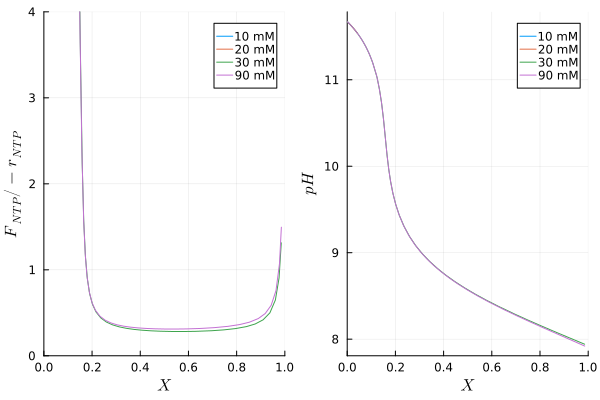

In [20]:
pltL = plot(ylims = (0,4),xlims = (0,1))
pltpH = plot(xlims = (0,1))
maxconversion = 0.99
tol = 1e-7
finaltime = 30

NTPconc = 30e-3
Mgconc = 10e-3

inputs =(T7RNAP = T7RNAP, ATP = NTPconc/4,UTP = NTPconc/4,CTP = NTPconc/4,GTP = NTPconc/4, Mg = Mgconc, Buffer = Buffer, DNA = DNA, final_time = finaltime)

getLevenspielplot!(pltL,fittedparams,inputs; PPiase = PPiase, stoich = stoich, label = "10 mM", NaperNTP = 4.90, maxconversion = maxconversion, tol = tol)
conversionpHplot!(pltpH,fittedparams,inputs; PPiase = PPiase, stoich = stoich, label = "10 mM", NaperNTP = 4.90, maxconversion = maxconversion, tol = tol)

NTPconc = 30e-3
Mgconc = 20e-3

inputs =(T7RNAP = T7RNAP, ATP = NTPconc/4,UTP = NTPconc/4,CTP = NTPconc/4,GTP = NTPconc/4, Mg = Mgconc, Buffer = Buffer, DNA = DNA, final_time = finaltime)

getLevenspielplot!(pltL,fittedparams,inputs; PPiase = PPiase, stoich = stoich, label = "20 mM", NaperNTP = 4.90, maxconversion = maxconversion, tol = tol)
conversionpHplot!(pltpH,fittedparams,inputs; PPiase = PPiase, stoich = stoich, label = "20 mM", NaperNTP = 4.90, maxconversion = maxconversion, tol = tol)

NTPconc = 30e-3
Mgconc = 30e-3
finaltime = 1000
inputs =(T7RNAP = T7RNAP, ATP = NTPconc/4,UTP = NTPconc/4,CTP = NTPconc/4,GTP = NTPconc/4, Mg = Mgconc, Buffer = Buffer, DNA = DNA, final_time = finaltime)

getLevenspielplot!(pltL,fittedparams,inputs; PPiase = PPiase, stoich = stoich, label = "30 mM", NaperNTP = 4.90, maxconversion = maxconversion, tol = tol)
conversionpHplot!(pltpH,fittedparams,inputs; PPiase = PPiase, stoich = stoich, label = "30 mM", NaperNTP = 4.90, maxconversion = maxconversion, tol = tol)

NTPconc = 30e-3
Mgconc = 90e-3
finaltime = 1000
inputs =(T7RNAP = T7RNAP, ATP = NTPconc/4,UTP = NTPconc/4,CTP = NTPconc/4,GTP = NTPconc/4, Mg = Mgconc, Buffer = Buffer, DNA = DNA, final_time = finaltime)

getLevenspielplot!(pltL,fittedparams,inputs; PPiase = PPiase, stoich = stoich, label = "90 mM", NaperNTP = 4.90, maxconversion = maxconversion, tol = tol)
conversionpHplot!(pltpH,fittedparams,inputs; PPiase = PPiase, stoich = stoich, label = "90 mM", NaperNTP = 4.90, maxconversion = maxconversion, tol = tol)

plt = plot(pltL,pltpH, xlims = (0,1))
savefig(plt,"../figures/GM6_27/CSTR2.png")
plt